In [1]:
import pylab as plt 
import pandas as pd
import numpy as np
from astropy.constants import R_earth, m_e, c
from astropy import units
from tqdm import tqdm
from scipy.constants import elementary_charge

In [2]:
from plotting_utils import add_earth

In [3]:
def plot(df_sub, fname=None):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'z{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Z (SM)')
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.xlim(-1, 7)
    plt.ylim(-3, 3)
    add_earth()
    plt.gca().set_aspect("equal")
        
    plt.subplot(122)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'y{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Y (SM)')
    plt.xlim(-1, 7)
    plt.ylim(-7, 7)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    add_earth()
    plt.gca().set_aspect("equal")
    
    if fname:
        plt.savefig(fname)
        plt.close()


In [35]:
df = pd.read_csv('data/test_lfm.csv')
print(len(df.index))

119


In [36]:
df

,Unnamed: 0,t0,x0,y0,z0,ppar0,B0,W0,h0,t50,...,W400,h400,t450,x450,y450,z450,ppar450,B450,W450,h450
0,0,0.235017,5.999842,0.001525,0.056050,0.408618,-13.000561,0.217066,0.251566,0.235017,...,0.216414,0.251658,0.235017,6.013344,0.001524,0.056084,0.408616,-12.926904,0.216333,0.251669
1,1,0.486583,5.998183,0.003175,0.116064,0.408365,-13.008682,0.217061,0.264715,0.486595,...,0.216411,0.264884,0.486686,6.011690,0.003175,0.116158,0.408365,-12.934987,0.216330,0.264905
2,2,0.751298,5.994752,0.004911,0.179101,0.407864,-13.025078,0.217056,0.275072,0.751331,...,0.216407,0.275303,0.751591,6.008265,0.004913,0.179279,0.407870,-12.951328,0.216326,0.275332
3,3,1.026370,5.989359,0.006711,0.244392,0.407088,-13.050688,0.217051,0.283183,1.026431,...,0.216404,0.283463,1.026923,6.002878,0.006717,0.244674,0.407102,-12.976872,0.216322,0.283498
4,4,1.309553,5.981873,0.008556,0.311285,0.406015,-13.086218,0.217045,0.289538,1.309649,...,0.216398,0.289856,1.310422,5.995397,0.008567,0.311686,0.406040,-13.012122,0.216318,0.289896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,47.428296,5.078261,0.189182,-1.939248,0.214262,-18.610466,0.223031,0.666903,47.417858,...,0.222435,0.690641,47.468261,5.062384,0.188373,-1.964095,0.202660,-18.718946,0.222125,0.693556
115,115,47.428296,5.078261,0.189182,-1.939248,0.214262,-18.610466,0.223031,0.606304,47.417858,...,0.222435,0.627194,47.468261,5.062384,0.188373,-1.964095,0.202660,-18.718946,0.222125,0.629707
116,116,47.428296,5.078261,0.189182,-1.939248,0.214262,-18.610466,0.223031,0.566641,47.417858,...,0.222435,0.585846,47.468261,5.062384,0.188373,-1.964095,0.202660,-18.718946,0.222125,0.588131
117,117,47.428296,5.078261,0.189182,-1.939248,0.214262,-18.610466,0.223031,0.539863,47.417858,...,0.222435,0.558059,47.468261,5.062384,0.188373,-1.964095,0.202660,-18.718946,0.222125,0.560206


(0.1109204457105321, 0.11396856897285136)

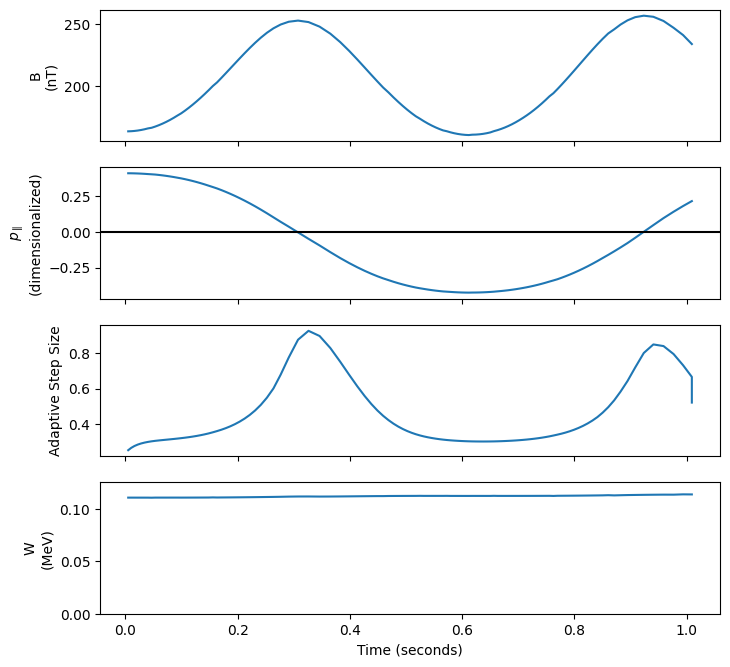

In [37]:
sf = c / R_earth
t = (df['t0'].values / sf).to(units.s).value

q = - elementary_charge * units.C
sf = (q * R_earth / (m_e * c**2))
B = (df['B0'].values * units.s/ R_earth / sf).to(units.nT)

p = df['ppar0'].values
W = (df['W0'].values * (m_e * c**2)).to(units.MeV).value
#print(df['W0'].values)
fig, axes = plt.subplots(4, 1,sharex=True, figsize=(8, 8), dpi=100)
axes[0].plot(t, B, '-')
axes[0].set_ylabel('B\n(nT)')
axes[1].plot(t, p, '-')
axes[1].set_ylabel(r'$p_\parallel$' +'\n(dimensionalized)')
axes[1].axhline(0, color='k')
axes[2].plot(t, df['h0'], '-')
axes[2].set_ylabel('Adaptive Step Size')
axes[3].plot(t, W, '-')
axes[3].set_ylabel('W\n(MeV)')
axes[3].set_ylim(0, W.max() * 1.1)
axes[3].set_xlabel('Time (seconds)')

W[0], W[-1], W[0]/

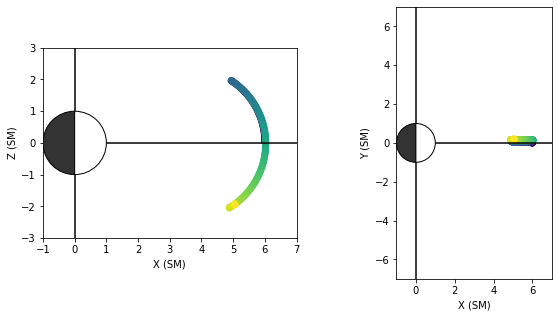

In [7]:
plot(df)

In [ ]:
import joblib
tasks = []

for i in range(len(df.index)):
    tasks.append(joblib.delayed(plot)(df.iloc[i:i+100], 'plots/%04d.png' % i))
    
print(f'Tasks: {len(tasks)}')

joblib.Parallel(n_jobs=-1, verbose=1)(tasks)

Tasks: 81671


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |